<a href="https://colab.research.google.com/github/meti-94/TextClassification/blob/main/fasttext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install umap-learn[plot] -q
!pip install holoviews -q
!pip install -U ipykernel -q 
!pip install bokeh -q 
# !pip install sentence_transformers -q

     |████████████████████████████████| 80 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 13.6 MB/s 
     |████████████████████████████████| 15.8 MB 616 bytes/s 
     |████████████████████████████████| 76 kB 6.6 MB/s 
     |████████████████████████████████| 769 kB 39.6 MB/s 
     |████████████████████████████████| 118 kB 72.0 MB/s 
     |████████████████████████████████| 766 kB 40.0 MB/s 
     |████████████████████████████████| 1.0 MB 66.8 MB/s 
     |████████████████████████████████| 722 kB 64.4 MB/s 
     |████████████████████████████████| 722 kB 53.0 MB/s 
     |████████████████████████████████| 715 kB 59.0 MB/s 
     |████████████████████████████████| 705 kB 60.5 MB/s 
     |████████████████████████████████| 699 kB 52.2 MB/s 
     |████████████████████████████████| 696 kB 58.1 MB/s 
     |████████████████████████████████| 684 kB 55.3 MB/s 
     |████████████████████████████████| 679 kB 55.8 MB/s 
     |████████████████████████████████| 675 kB 40.3 MB/s 
     |█████████

In [1]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.vec.gz
!gzip -d cc.fa.300.vec.gz

--2021-08-09 11:41:43--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258183862 (1.2G) [binary/octet-stream]
Saving to: ‘cc.fa.300.vec.gz’

cc.fa.300.vec.gz    100%[===================>]   1.17G  31.6MB/s    in 36s     

2021-08-09 11:42:19 (33.1 MB/s) - ‘cc.fa.300.vec.gz’ saved [1258183862/1258183862]



In [19]:
import numpy as np 
import pandas as pd
import re 
import sys

In [69]:
import pandas as pd
import umap 
import umap.plot

import matplotlib.pyplot as plt
from bokeh.plotting import show, save, output_notebook, output_file

In [6]:
EMBEDDING_FILE = 'cc.fa.300.vec'

In [7]:
print('Indexing word vectors')
count = 0
embeddings_index = {}
f = open(EMBEDDING_FILE)
for line in f:
    values = line.split()
    word = ' '.join(values[:-300])
    coefs = np.asarray(values[-300:], dtype='float32')
    embeddings_index[word] = coefs.reshape(-1)
    coef = embeddings_index[word]
f.close()

Indexing word vectors


In [14]:
def extract_entities(row): # behmanesh 1st rule 
    
    ent1 = re.search('</?e1>.*</?e1>', row['text']).group(0)
    ent2 = re.search('</?e2>.*</?e2>', row['text']).group(0)
    ent1 = ent1.replace('</e1>', '').replace('<e1>', '').strip()
    ent2 = ent2.replace('</e2>', '').replace('<e2>', '').strip()

    return ent1+'|'+ent2

In [84]:
def vectorizer(string):
  ent1, ent2 = str(string).split('|')
  ent1 = ent1.split(); ent2 = ent2.split()
  vectors = []
  for item in ent1:
    if item in embeddings_index:
      vectors.append(embeddings_index[item])
  ent1 = np.array(vectors, dtype='float32').mean(axis=0)
  ent1 = ent1 if vectors else np.zeros(300, dtype='float32')
  vectors = []
  for item in ent2:
    if item in embeddings_index:
      vectors.append(embeddings_index[item])
  ent2 = np.array(vectors, dtype='float32').mean(axis=0)
  ent2 = ent2 if vectors else np.zeros(300, dtype='float32')
  return ent1+ent2

In [85]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [86]:
train['entities'] = train.apply(extract_entities, axis='columns')
test['entities'] = test.apply(extract_entities, axis='columns')


In [87]:
test['vectors'] = test.entities.astype(str).apply(vectorizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  


In [93]:
embedding = umap.UMAP(n_components=2, metric='cosine').fit(np.array(test.vectors.to_list()))

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:126: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 21998 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  f"A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.\n"


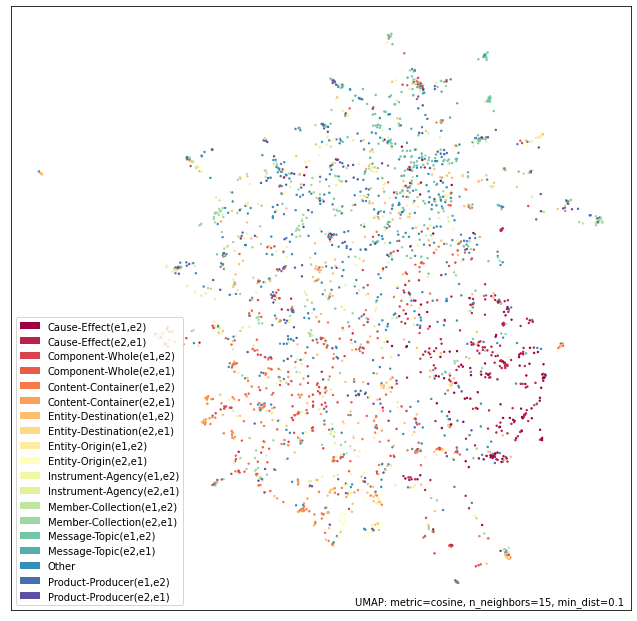

In [94]:
targets = pd.read_excel('./test.xlsx')['target']
f = umap.plot.points(embedding, labels=targets)

In [70]:
test

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,target,no_tag,POS,tree,augmented,entities,vectors
0,0,0,0,معمول ترین <e1> حسابرسی‌ها </e1> مربوط به <...,"Message-Topic(e1,e2)",معمول ترین حسابرسی‌ها مربوط به ضایعات...,"[('معمول', 'AJ'), ('ترین', 'Ne'), ('حسابرسی\u2...",[معمول ترین حسابرسی‌ها NP] [مربوط ADJP] [به PP...,[SEP] <e1> حسابرسی‌ها </e1> به <e2> ضایعات <...,حسابرسی‌ها|ضایعات,"[-0.030199999, -0.037299998, 0.0654, 0.099, 0...."
1,1,1,1,این <e1> شرکت <e2> </e1> صندلی‌های </e2> پ...,"Product-Producer(e2,e1)",این شرکت صندلی‌های پلاستیکی را تول...,"[('این', 'DET'), ('شرکت', 'Ne'), ('صندلی\u200c...",[این شرکت NP] [صندلی‌های پلاستیکی NP] [را POST...,[SEP] <e1> شرکت </e1> <e2> صندلی‌های </e2> ر...,شرکت <e2>|</e1> صندلی‌های,"[-0.0224, -0.0698, -0.025899999, 0.0244, -0.11..."
2,2,2,2,<e1> استاد </e1> مدرسه با یک <e2> چوب </e2...,"Instrument-Agency(e2,e1)",استاد مدرسه با یک چوب درس می آموزد .,"[('استاد', 'Ne'), ('مدرسه', 'N'), ('با', 'P'),...",[استاد مدرسه NP] [با PP] [یک چوب درس می NP] [آ...,[SEP] <e1> استاد </e1> با <e2> چوب </e2> آمو...,استاد|چوب,"[-0.1455, -0.1189, 0.0838, -0.076, -0.0419, -0..."
3,3,3,3,مظنون <e1> بدن </e1> مرده را به یک <e2> آب‌...,"Entity-Destination(e1,e2)",مظنون بدن مرده را به یک آب‌انبار م...,"[('مظنون', 'Ne'), ('بدن', 'Ne'), ('مرده', 'AJ'...",[مظنون بدن مرده NP] [را POSTP] [به PP] [یک آب‌...,[SEP] <e1> بدن </e1> را به <e2> آب‌انبار </e...,بدن|آب‌انبار,"[0.0399, 0.0042999983, -0.0323, -0.0744, -0.05..."
4,4,4,4,<e1> آنفولانزای </e1> مرغی یک بیماری عفونی پ...,"Cause-Effect(e2,e1)",آنفولانزای مرغی یک بیماری عفونی پرندگان ...,"[('آنفولانزای', 'Ne'), ('مرغی', 'AJ'), ('یک', ...",[آنفولانزای مرغی NP] [یک بیماری عفونی پرندگان ...,[SEP] <e1> آنفولانزای </e1> از <e2> ویروس </...,آنفولانزای|ویروس,"[-0.062400002, -0.0444, 0.0083, -0.0723, -0.00..."
...,...,...,...,...,...,...,...,...,...,...,...
2712,2712,2712,2712,پس از جاگذاری تمام بتها ، که خود ساعت‌ها طول م...,"Instrument-Agency(e2,e1)",پس از جاگذاری تمام بتها ، که خود ساعت‌ها طول م...,"[('پس', 'P'), ('از', 'P'), ('جاگذاری', 'Ne'), ...",[پس از PP] [جاگذاری تمام بتها NP] ، که [خود NP...,[SEP] پس از طول می کشد <e1> پادشاه </e1> را ...,پادشاه|جارو می کشد,"[-0.0586, -0.062633336, 0.026133334, 0.0700666..."
2713,2713,2713,2713,وزیر تولید کندِ <e1> مصالح </e1> توسط <e2> ...,"Product-Producer(e1,e2)",وزیر تولید کندِ مصالح توسط صنایع م...,"[('وزیر', 'Ne'), ('تولید', 'Ne'), ('کندِ', 'AJ...",[وزیر تولید کندِ مصالح NP] [توسط PP] [صنایع مح...,[SEP] <e1> مصالح </e1> توسط <e2> صنایع </e2>...,مصالح|صنایع,"[0.017099999, 0.018399999, 0.14289999, -0.0332..."
2714,2714,2714,2714,<e2> قاب <e1> </e2> چتر </e1> دارای یك گیر...,"Component-Whole(e2,e1)",قاب چتر دارای یك گیره متحرك در انت...,"[('قاب', 'Ne'), ('چتر', 'N'), ('دارای', 'AJe')...",[قاب چتر دارای یك گیره متحرك NP] [در PP] [انته...,[SEP] <e2> قاب <e1> </e2> </e1> در در تجهیز ...,</e2> چتر|قاب <e1>,"[0.1397, -0.0744, -0.08400001, 0.2949, 0.0427,..."
2715,2715,2715,2715,(کف دست : دست‌های چاق ) یک <e1> فیلم </e1> ت...,"Product-Producer(e1,e2)",(کف دست : دست‌های چاق ) یک فیلم ترسناک ک...,"[('(', 'PUNC'), ('کف', 'Ne'), ('دست', 'N'), ('...",( [کف دست NP] : [دست‌های چاق NP] ) [یک فیلم تر...,[SEP] <e1> فیلم </e1> ساخته شده توسط با <e2>...,فیلم|فروشنده,"[0.1002, 0.033999998, 0.026899999, 0.030200005..."


In [90]:
!git clone https://github.com/Nealcly/BiLSTM-LAN.git

Cloning into 'BiLSTM-LAN'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 163 (delta 0), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (163/163), 5.30 MiB | 9.07 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [ ]:
cd 